In [1]:
# Installing GraphLearning package
pip install graphlearning

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.6/70.6 kB 1.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for graphlearning: filename=graphlearning-1.2.7-cp310-cp310-linux_x86_64.whl size=153438 sha256=338778045eeb5d3cf85a45b0ba6753833e4d9411dc88066aceb8c0bb52139f94
  Stored in directory: /root/.cache/pip/wheels/ed/1f/c5/57aca2c392ce721acbac16a526733fbf1297028eca695cf2c1
Successfully built graphlearning


In [2]:
pip install annoy torch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 647.5/647.5 kB 6.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for annoy: filename=annoy-1.17.3-cp310-cp310-linux_x86_64.whl size=552448 sha256=49ccb778fba858ed83355120283d1c853f00bb1dbda626dbf8db5e21b9b27103
  Stored in directory: /root/.cache/pip/wheels/64/8a/da/f714bcf46c5efdcfcac0559e63370c21abe961c48e3992465a
Successfully built annoy


MODEL 1: RAW MODEL WITH COMBINATORIAL LAPLACIAN (L=D-W)

In [3]:
# Import packages
import graphlearning as gl
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Load data
data_vae, labels = gl.datasets.load('fashionmnist')

In [11]:
# KNN Graph Construction values and Number of Labels for learning process
k_values = [5, 25, 35]
label_counts = [1, 3, 5, 10, 17, 34, 68, 136, 272, 544]


In [12]:
# Graph construction and Label Inference
results = {}

for k in k_values:
    results[k] = {'accuracy': [], 'Test_Error': [], 'test_error': []}

    # Graph Construction
    W_gaussian = gl.weightmatrix.knn(data_vae, k, kernel='gaussian')
    G = gl.graph(W_gaussian)

    for num_labels in label_counts:

        # Generate training indices and training labels
        train_ind = gl.trainsets.generate(labels, rate=num_labels)
        train_labels = labels[train_ind]

        # Compute β (probability of hitting a labelled node)
        beta = len(train_ind) / len(data_vae)

        # Compute γ (average transition probability between labelled and unlabelled nodes)
        gamma = np.mean(W_gaussian[train_ind])

        # Perform semi-supervised learning using the Laplace method
        pred_labels = gl.ssl.laplace(W_gaussian, normalization= 'combinatorial').fit_predict(train_ind, train_labels)

        # Compute ε (error relationship derived theoretically)
        epsilon = 1 / (beta * gamma + 1)

        # Calculate accuracy and test error
        accuracy = gl.ssl.ssl_accuracy(labels, pred_labels, len(train_ind))
        Test_Error = 100 - (accuracy)
        test_error = (epsilon * 100)

        results[k]['accuracy'].append(accuracy)
        results[k]['Test_Error'].append(Test_Error)
        results[k]['test_error'].append(test_error)

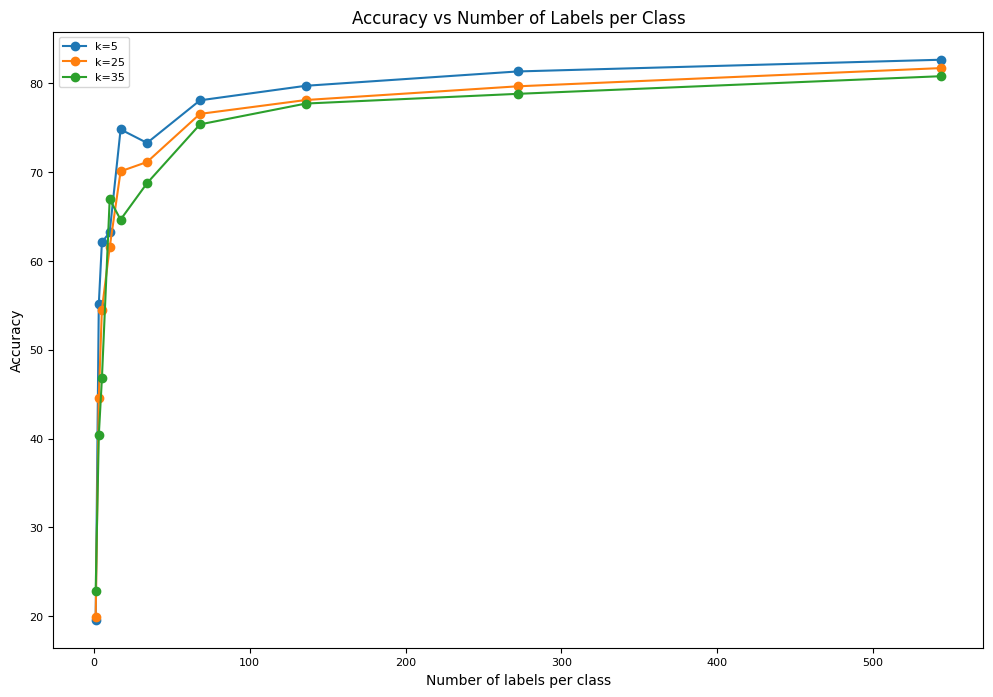

In [13]:
#Accuracy vs Number of Labels per class plot
plt.figure(figsize =(12, 8))
for k in k_values:
    plt.plot(label_counts, results[k]['accuracy'], label=f'k={k}', marker='o')

plt.title('Accuracy vs Number of Labels per Class', fontsize=12)
plt.xlabel('Number of labels per class', fontsize=10)
plt.ylabel('Accuracy', fontsize=10)
plt.legend(fontsize=8)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.show()

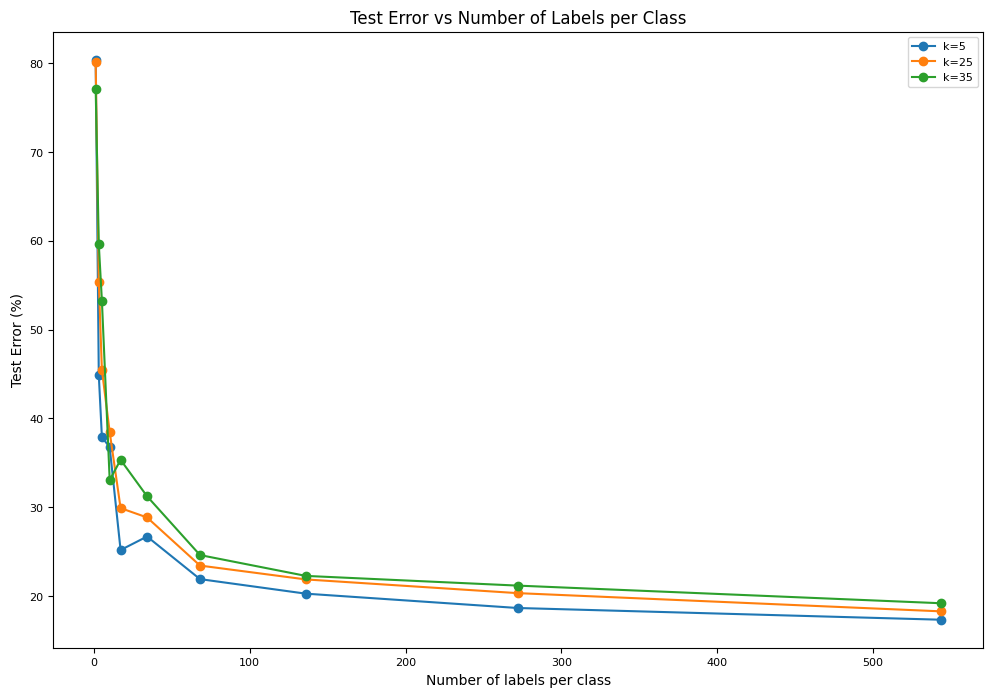

In [14]:
# Test error vs Number of Labels per class plot
plt.figure(figsize =(12, 8))
for k in k_values:
    plt.plot(label_counts, results[k]['Test_Error'], label=f'k={k}' , marker='o')

plt.title('Test Error vs Number of Labels per Class', fontsize=12)
plt.xlabel('Number of labels per class', fontsize=10)
plt.ylabel('Test Error (%)', fontsize=10)
plt.legend(fontsize=8)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.show()

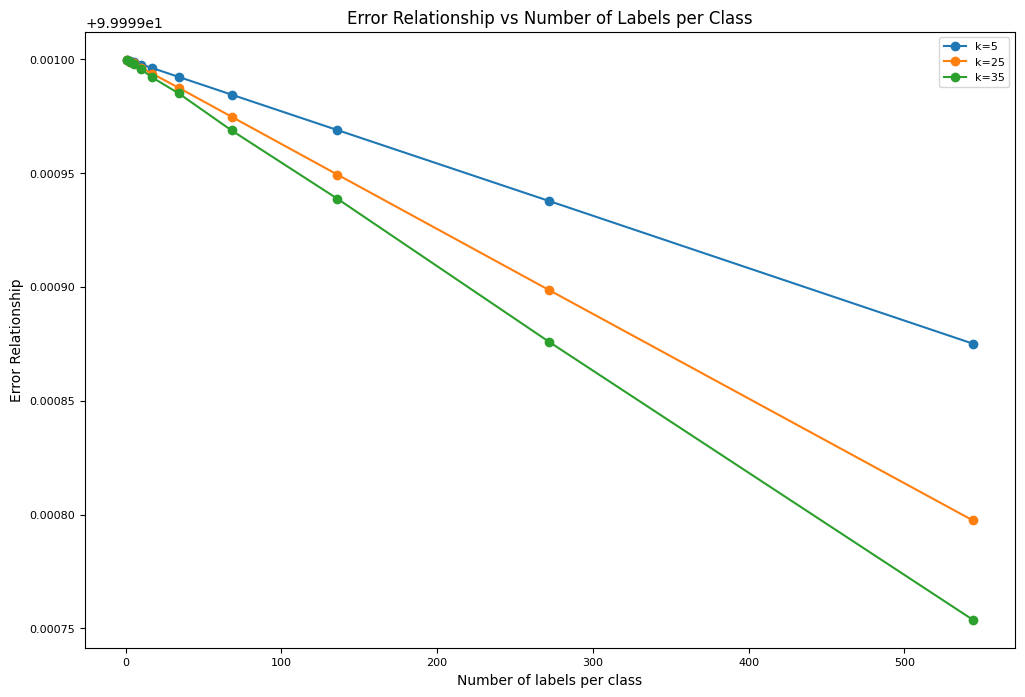

In [15]:
# Theoretically derived error vs number of labelled per class plot
plt.figure(figsize =(12, 8))
for k in k_values:
    plt.plot(label_counts, results[k]['test_error'], label=f'k={k}', marker='o')

plt.title('Error Relationship vs Number of Labels per Class', fontsize=12)
plt.xlabel('Number of labels per class', fontsize=10)
plt.ylabel('Error Relationship', fontsize=10)
plt.legend(fontsize=8)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.show()